In [1]:
import numpy as np
import pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import SimpleITK as sitk
from dataloader import extract_patch
sns.set_style("white")

# Instructions

1. Make sure to download the dataset: https://luna23-ismi.grand-challenge.org/datasets/
2. Copy the zip file into a new folder at the root of your git repository and name it `dataset/`
3. Extract the zip file inside this folder
4. Make sure that the training images are inside `dataset/train_set/images/`

In [2]:
train_df = pandas.read_csv("dataset/luna23-ismi-train-set.csv")
train_images_path = Path("dataset/train_set/images/")
train_labels_path = Path("dataset/train_set/labels/")

patientid                                         LIDC-IDRI-0003
seriesuid      1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...
noduleid       2.25.85475102690801320257961710717610351452149...
coordx                                                 73.960959
coordy                                                 74.526282
coordz                                               -213.000787
diameter_mm                                             31.66447
noduletype                                    GroundGlassOpacity
malignancy                                                     0
Name: 0, dtype: object


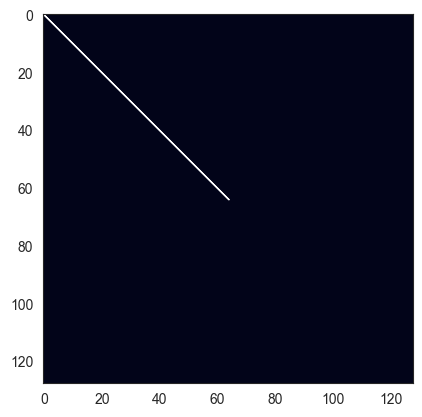

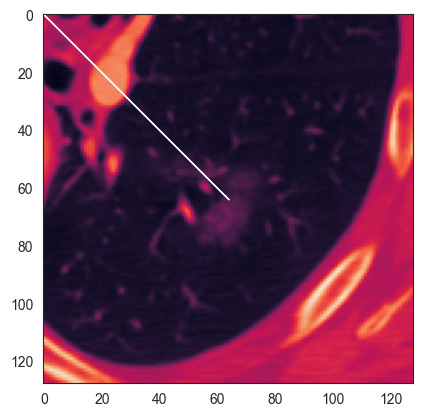

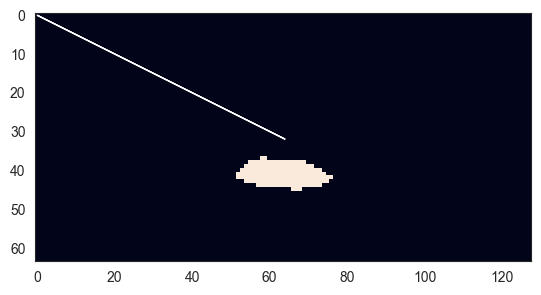

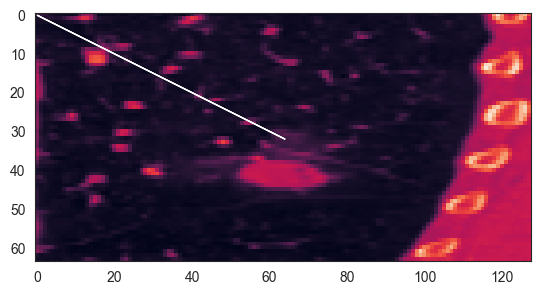

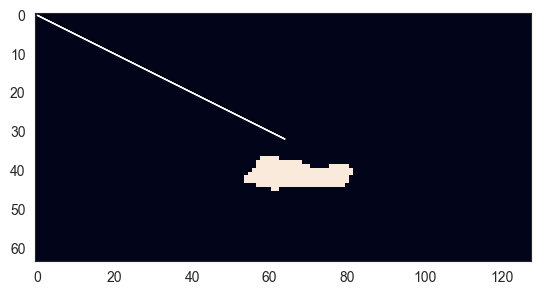

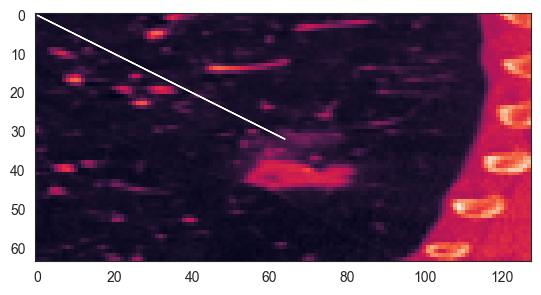

(1, 64, 64, 64)


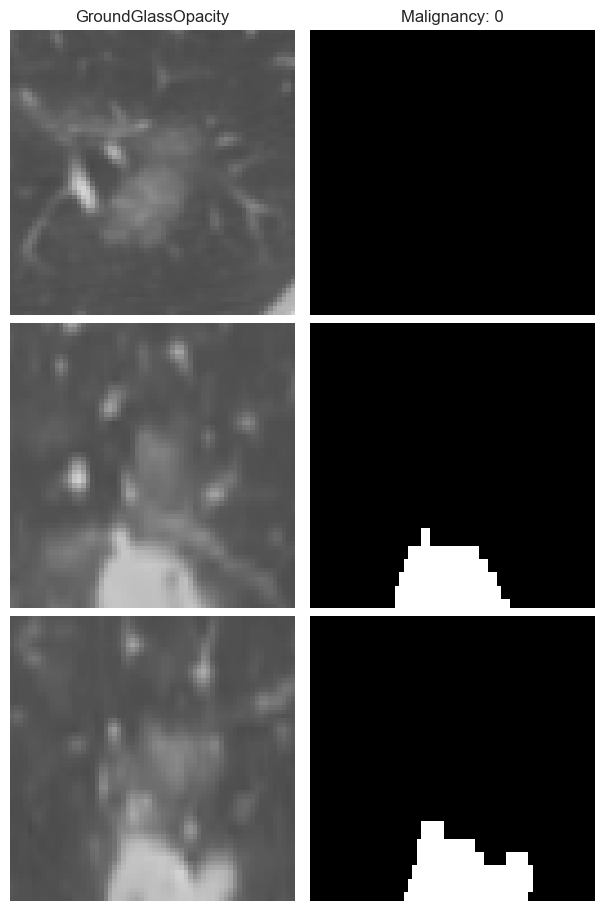

In [9]:
for i in (0,):

    pd = train_df.iloc[i]
    print(pd)

    image = sitk.ReadImage(str(train_images_path / f"{pd.noduleid}.mha"))
    label = sitk.ReadImage(str(train_labels_path / f"{pd.noduleid}.mha"))
    
    plt.imshow(sitk.GetArrayFromImage(label)[32])
    plt.arrow(0,0,64,64)
    plt.show()
    plt.imshow(sitk.GetArrayFromImage(image)[32])
    plt.arrow(0,0,64,64)
    plt.show()
    plt.imshow(sitk.GetArrayFromImage(label)[:,64])
    plt.arrow(0,0,64,32)
    plt.show()
    plt.imshow(sitk.GetArrayFromImage(image)[:,64])
    plt.arrow(0,0,64,32)
    plt.show()
    plt.imshow(sitk.GetArrayFromImage(label)[:,:,64])
    plt.arrow(0,0,64,32)
    plt.show()
    plt.imshow(sitk.GetArrayFromImage(image)[:,:,64])
    plt.arrow(0,0,64,32)
    plt.show()
    

    image_patch, label_patch = extract_patch(
        CTData=sitk.GetArrayFromImage(image),
        coord=(32, 64, 64),
        srcVoxelOrigin=(0, 0, 0),
        srcWorldMatrix=np.array(np.flip(image.GetDirection())).reshape(3, 3),
        srcVoxelSpacing=np.flip(image.GetSpacing()),
        mask=sitk.GetArrayFromImage(label),
    )

    print(image_patch.shape)

    fig, ax = plt.subplots(3, 2, figsize=(6, 9), constrained_layout=True)
    
    ax[0, 0].imshow(image_patch[0, 32], vmin=-1500, vmax=500, cmap="gray")
    ax[0, 1].imshow(label_patch[0, 32], vmin=0, vmax=1, cmap="gray")

    ax[1, 0].imshow(image_patch[0, :, 32], vmin=-1500, vmax=500, cmap="gray")
    ax[1, 1].imshow(label_patch[0, :, 32], vmin=0, vmax=1, cmap="gray")

    ax[2, 0].imshow(image_patch[0, :, :, 32], vmin=-1500, vmax=500, cmap="gray")
    ax[2, 1].imshow(label_patch[0, :, :, 32], vmin=0, vmax=1, cmap="gray")
    
    ax[0, 0].set_title(pd.noduletype)
    ax[0, 1].set_title(f"Malignancy: {pd.malignancy}")

    [ax[a][b].axis("off") for a in range(3) for b in range(2)]